In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import date, datetime

# Configuración

In [2]:
# La llave será el nombre final de la columna, el valor el nombre con el que se encuentra en los archivos brutos
COLUMNAS = {
    'DOCUMENTO': 'Número de Documento',
    'CODIGO': 'Codigo',
    'NOMBRE': 'Nombres',
    'APELLIDO': 'Apellidos',
    'TELEFONO': 'Teléfono Celular que usa',
    'EMAIL': 'Correo electrónico personal que usa',
    'DEDICACION RUTA': '¿Qué dedicación de tiempo diaria espera tener con el proyecto Misión TIC 2022?',
    'DISP_PROGRAMACION': 'Seleccione por lo menos dos (2) de las franjas horarias especificadas en las cuales tiene disponibilidad de tiempo para atender las clases sincrónicas del módulo de PROGRAMACIÓN que cursará durant...',
    'DISP_INGLES': 'Seleccione por lo menos dos (2) de las franjas horarias en las cuales tiene disponibilidad de tiempo para atender las clases sincrónicas del módulo INGLÉS (5 horas/semana), es decir (1 hora/día de...',
    'DISP_COACHING': 'Seleccione por lo menos dos (2) de las franjas horarias en las cuales tiene disponibilidad de tiempo para atender las clases sincrónicas del módulo COACHING/HABILIDADES PERSONALES (1 hora/semana)',
    'TRAB_COLABORATIVO': '¿Qué franja de horario le convendría para desarrollar el trabajo colaborativo que amerita el desarrollo de un proyecto Web o móvil? (Aplica para los Ciclos 3 y 4)',
    'FECHA_NACIMIENTO': 'Fecha de Nacimiento',
    'GENERO': 'Sexo',
    'NIVEL_EDUCATIVO_REAL': 'Nivel de Escolaridad',
    'OCUPACION': 'Ocupación',
    'TITULO_SI_TIENE': 'Si es técnico, tecnólogo o profesional, escriba su título académico',
    'DISCAPACIDAD': '¿Presenta alguna discapacidad?',
    'DETALLE_DISCAPACIDAD': "Si en la anterior pregunta su respuesta fue 'Si', por favor detalle el tipo de discapacidad."
}

COLUMNAS_ADICIONALES = {
    'nivelE': 'NIVEL_EDUCATIVO_AGRUPADO',
    'obs': 'OBSERVACION'
}

GRUPOS_EDUCATIVOS = {
    'BACHILLER': [
        'Ninguno',
        'Bachillerato Técnico',
        'Bachillerato Académico',
        'Bachillerato Comercial'
    ],
    'TÉCNICO': [
        'Técnica',
        'Tecnológico'
    ],
    'PROFESIONAL+': [
        'Posgrado',
        'Profesional'
    ]
}

GRUPOS_ETARIOS = {
    'No especifica': 0,
    'Errores': 0,
    '14 a 20': 0,
    '20 a 30': 0,
    '30 a 40': 0,
    '40 a 50': 0,
    '50 a 60': 0,
    'Más de 60': 0
}

JORNADA_DEFECTO_PROGRAMACION = 'Jornada de la noche (8 p.m. a 10 p.m.)'
JORNADA_DEFECTO_INGLES_COACH = 'Jornada de la noche (7 p.m. a 8 p.m.)'

In [3]:
ESTUDIANTES_EXCLUIDOS = [
    # Estudiantes que no entran a ciclo 1
    2220111, # Fabian David
    2220135, # Juan Diego
    2220249, # Farid Jose
    2220256, # Diego Alejandro
    2220605, # Miguel Ángel
    2220755, # Juan David
    2220841, # Gerson David
    2221039, # Hector Armando
    2221575, # Iván Camilo
    2222796, # Andrés Felipe
    2223097, # Camilo Andrés
    
    # Otros estudiantes debajo de esta línea
    # Estudiantes que no desean continuar
    2224295, # No está en el consolidado
    2224297, # No está en el consolidado
    2224300, # No está en el consolidado
    2224306, # No está en el consolidado
    2224320, # No está en el consolidado
    2224331, # No está en el consolidado
    2224336, # No está en el consolidado
    2224400, # No está en el consolidado
    2224425, # No está en el consolidado
    2224437, # No está en el consolidado
    2224450, # No está en el consolidado
    2224457, # No está en el consolidado
    2224464, # No está en el consolidado
    2224477, # No está en el consolidado
    2224579, # No está en el consolidado
    2224639, # No está en el consolidado
    2223233, 
    2224441, # No está en el consolidado
    2220474,
]

In [4]:
# FUNCIONES
def iniciarContadores(jornadas):
    dic = {}
    for jornada in jornadas:
        dic[jornada] = 0
    return dic
def tokenizadoFiltrado(cadena, separador, defecto):
    rta = []
    if (type(cadena) != str):
        return [defecto]
    tokens = cadena.split(separador)
    for token in tokens:
        if token != '':
            if token == 'Jornada de la tarde (10 a.m. a 11 a.m.)':
                rta.append('Jornada de la mañana (10 a.m. a 11 a.m.)')
            elif token == 'Jornada de la tarde (11 a.m. a 12 m.)':
                rta.append('Jornada de la mañana (11 a.m. a 12 m.)')
            else:
                rta.append(token)
    return rta
def calcularEdad(bdate):
    today = date.today()
    age = today.year - bdate.year - ((today.month, today.day) < (bdate.month, bdate.day))
    return age
def obtenerEdad(fecha):
    if fecha == '' or fecha == None:
        return -1
    if isinstance(fecha, pd._libs.tslibs.timestamps.Timestamp):
        return calcularEdad(fecha)    
    try:
        fecha = pd.TimedeltaIndex([fecha], unit='d') + datetime(1899, 12, 30)
        return calcularEdad(fecha)
    except:        
        return -2

# Procesamiento

In [5]:
archivos = glob.glob('./INPUT/INDAGAR/*.xlsx')
dfs = []
for archivo in archivos:
    dfs.append(pd.read_excel(archivo, engine = 'openpyxl'))
datos = pd.concat(dfs, ignore_index = True)
# Toma de las columnas valiosas
datos = datos[COLUMNAS.values()]

In [6]:
# Cargue de jornadas
JORNADAS = [
    'Jornada de la mañana (6 a.m. a 8 a.m.)',
    'Jornada de la mañana (8 a.m. a 10 a.m.)',
    'Jornada de la mañana (10 a.m. a 12 m.)',
    'Jornada de la tarde (12 m. a 2 p.m.)',
    'Jornada de la tarde (2 p.m. a 4 p.m.)',
    'Jornada de la tarde (4 p.m. a 6 p.m.)',
    'Jornada de la noche (6 p.m. a 8 p.m.)',
    'Jornada de la noche (8 p.m. a 10 p.m.)'
]
JORNADAS_COACH_INGLES = [
    'Jornada de la mañana (6 a.m. a 7 a.m.)',
    'Jornada de la mañana (7 a.m. a 8 a.m.)',
    'Jornada de la mañana (8 a.m. a 9 a.m.)',
    'Jornada de la mañana (9 a.m. a 10 a.m.)',
    'Jornada de la mañana (10 a.m. a 11 a.m.)',
    'Jornada de la mañana (11 a.m. a 12 m.)',
    'Jornada de la tarde (12 m. a 1 p.m.)',
    'Jornada de la tarde (1 p.m. a 2 p.m.)',
    'Jornada de la tarde (2 p.m. a 3 p.m.)',
    'Jornada de la tarde (3 p.m. a 4 p.m.)',
    'Jornada de la tarde (4 p.m. a 5 p.m.)',
    'Jornada de la tarde (5 p.m. a 6 p.m.)',
    'Jornada de la noche (6 p.m. a 7 p.m.)',
    'Jornada de la noche (7 p.m. a 8 p.m.)',
    'Jornada de la noche (8 p.m. a 9 p.m.)',
    'Jornada de la noche (9 p.m. a 10 p.m.)'
]
if len(JORNADAS)*2 != len(JORNADAS_COACH_INGLES):
    raise Exception('Jornadas mal configuradas.')

In [7]:
CONTEOS = {
    'PROGRAMACIÓN': iniciarContadores(JORNADAS),
    'INGLÉS': iniciarContadores(JORNADAS_COACH_INGLES),
    'COACHING': iniciarContadores(JORNADAS_COACH_INGLES),
}
grupoNivel = []
columnaObservacion = []
for index, row in datos.iterrows():
    edad = obtenerEdad(row[COLUMNAS['FECHA_NACIMIENTO']])
    if edad == -2 or edad < 14:
        GRUPOS_ETARIOS['Errores'] += 1
    elif edad == -1:
        GRUPOS_ETARIOS['No especifica'] += 1
    elif 14 <= edad < 20:
        GRUPOS_ETARIOS['14 a 20'] += 1
    elif 20 <= edad < 30:
        GRUPOS_ETARIOS['20 a 30'] += 1
    elif 30 <= edad < 40:
        GRUPOS_ETARIOS['30 a 40'] += 1
    elif 40 <= edad < 50:
        GRUPOS_ETARIOS['40 a 50'] += 1
    elif 50 <= edad < 60:
        GRUPOS_ETARIOS['50 a 60'] += 1
    elif edad >= 60:
        GRUPOS_ETARIOS['Más de 60'] += 1
    else:
        print ('Error', edad, type(edad), row)
        #raise Exception('Error', edad, type(edad), row)
    # Tomado y limpiado de los datos
    a = tokenizadoFiltrado(row[COLUMNAS['DISP_PROGRAMACION']], ';', JORNADA_DEFECTO_PROGRAMACION)
    b = tokenizadoFiltrado(row[COLUMNAS['DISP_INGLES']], ';', JORNADA_DEFECTO_INGLES_COACH)
    c = tokenizadoFiltrado(row[COLUMNAS['DISP_COACHING']], ';', JORNADA_DEFECTO_INGLES_COACH)
    # Guardado de la información
    datos.at[index, COLUMNAS['DISP_PROGRAMACION']] = ';'.join(a)
    datos.at[index, COLUMNAS['DISP_INGLES']] = ';'.join(b)
    datos.at[index, COLUMNAS['DISP_COACHING']] = ';'.join(c)
    jornadasEstudiante = {
        'PROGRAMACIÓN': a,
        'INGLÉS': b,
        'COACHING': c
    }
    for jornada in jornadasEstudiante:
        for horario in jornadasEstudiante[jornada]:
            if horario in CONTEOS[jornada]:
                CONTEOS[jornada][horario] += 1
            else:
                raise Exception(horario, jornada)
    band = False
    for grupoE in GRUPOS_EDUCATIVOS:
        for nivel in GRUPOS_EDUCATIVOS[grupoE]:
            if row[COLUMNAS['NIVEL_EDUCATIVO_REAL']] == nivel:
                grupoNivel.append(grupoE)
                band = True
                break
        if band:
            break
    if row[COLUMNAS['CODIGO']] in ESTUDIANTES_EXCLUIDOS:
        columnaObservacion.append('EXCLUIDO')
    else:
        columnaObservacion.append('')
datos[COLUMNAS['OCUPACION']] = datos[COLUMNAS['OCUPACION']].str.upper()
datos[COLUMNAS['TITULO_SI_TIENE']] = datos[COLUMNAS['TITULO_SI_TIENE']].str.upper()
datos[COLUMNAS_ADICIONALES['nivelE']] = pd.Series(grupoNivel)
datos[COLUMNAS_ADICIONALES['obs']] = pd.Series(columnaObservacion)

In [8]:
for tema in CONTEOS:
    suma = 0
    print ('========')
    print ('Horarios de', tema)
    for horario in CONTEOS[tema]:
        suma += CONTEOS[tema][horario]
    for horario in CONTEOS[tema]:
        total = CONTEOS[tema][horario]
        msg = 'Franja: {franja}, cantidad: {cantidad}, porcentaje: {porcentaje:.2f}'
        print (msg.format(franja = horario, cantidad = total, porcentaje = total/suma*100))
    print ('Total elecciones: ', suma)

Horarios de PROGRAMACIÓN
Franja: Jornada de la mañana (6 a.m. a 8 a.m.), cantidad: 968, porcentaje: 10.33
Franja: Jornada de la mañana (8 a.m. a 10 a.m.), cantidad: 942, porcentaje: 10.06
Franja: Jornada de la mañana (10 a.m. a 12 m.), cantidad: 657, porcentaje: 7.01
Franja: Jornada de la tarde (12 m. a 2 p.m.), cantidad: 491, porcentaje: 5.24
Franja: Jornada de la tarde (2 p.m. a 4 p.m.), cantidad: 589, porcentaje: 6.29
Franja: Jornada de la tarde (4 p.m. a 6 p.m.), cantidad: 789, porcentaje: 8.42
Franja: Jornada de la noche (6 p.m. a 8 p.m.), cantidad: 2359, porcentaje: 25.18
Franja: Jornada de la noche (8 p.m. a 10 p.m.), cantidad: 2572, porcentaje: 27.46
Total elecciones:  9367
Horarios de INGLÉS
Franja: Jornada de la mañana (6 a.m. a 7 a.m.), cantidad: 782, porcentaje: 7.63
Franja: Jornada de la mañana (7 a.m. a 8 a.m.), cantidad: 807, porcentaje: 7.88
Franja: Jornada de la mañana (8 a.m. a 9 a.m.), cantidad: 0, porcentaje: 0.00
Franja: Jornada de la mañana (9 a.m. a 10 a.m.), can

In [9]:
for grupo, num in GRUPOS_ETARIOS.items():
    print (grupo + ':', num)

No especifica: 0
Errores: 24
14 a 20: 533
20 a 30: 2118
30 a 40: 1394
40 a 50: 484
50 a 60: 146
Más de 60: 40


In [10]:
# GUARDADO
datosRenombrados = datos.rename(columns = {v: k for k, v in COLUMNAS.items()})
datosRenombrados.to_excel('./OUTPUT/INDAGAR/CONSOLIDADO_DATOS_IMPORTANTES.xlsx', index = False)

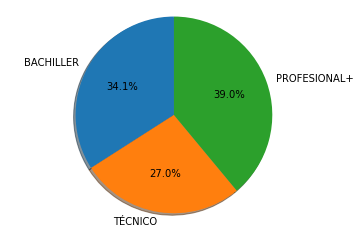

In [11]:
# Gráfica grupos de nivel educativo
labels = list(GRUPOS_EDUCATIVOS.keys())
sizes = []
for grupo in GRUPOS_EDUCATIVOS:
    sizes.append(len(datos[datos[COLUMNAS_ADICIONALES['nivelE']] == grupo]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [12]:
len(datosRenombrados)

4739